<a href="https://colab.research.google.com/github/younes-code/banking_marketing_campaign/blob/main/banking_marketing_campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import model_selection


from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import tensorflow as tf


In [52]:

df=pd.read_csv('bank.csv')

In [53]:
# number of rows adn columns in dataset
df.shape

(11162, 17)

In [54]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [56]:
# missing values
df.isnull().sum().sum()

0

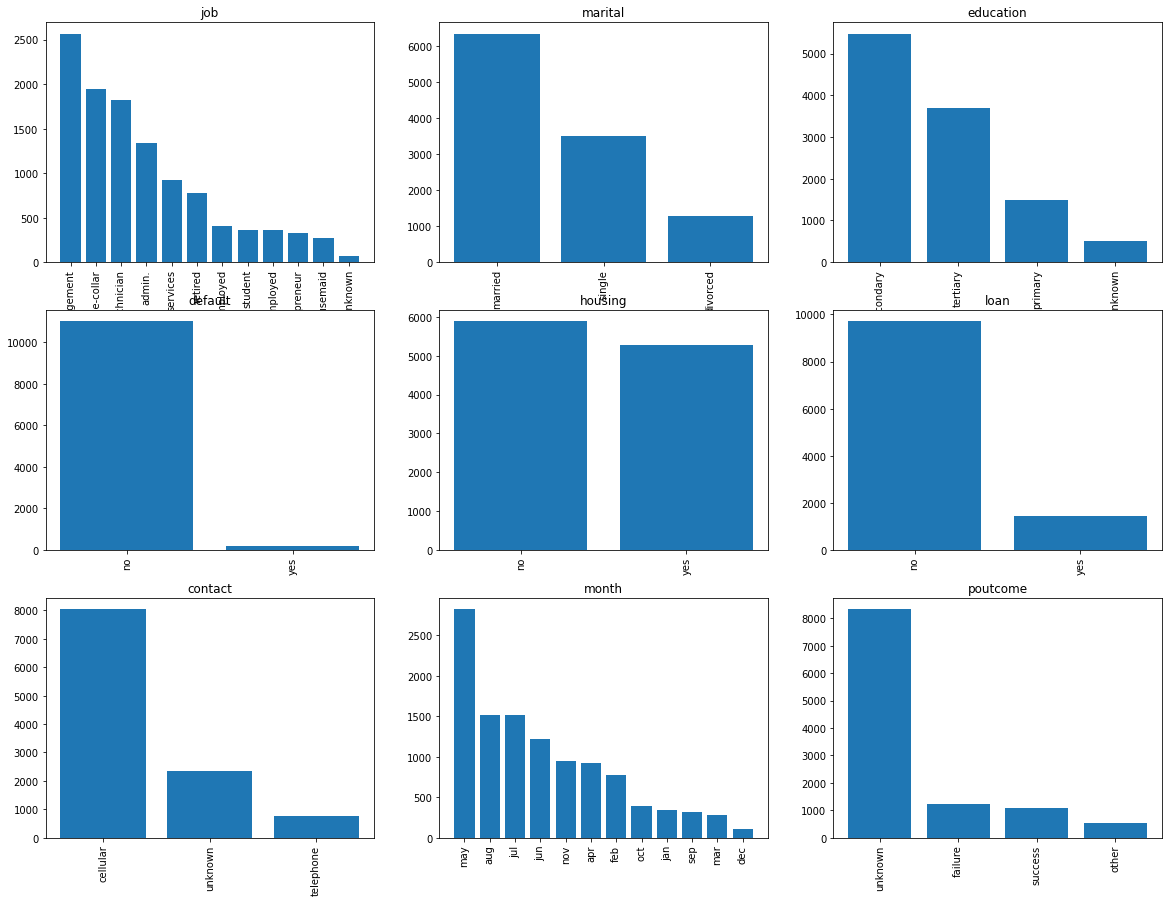

In [57]:
# Categorical columns exploration
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','month','poutcome']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in cat_columns:
    value_counts = df[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

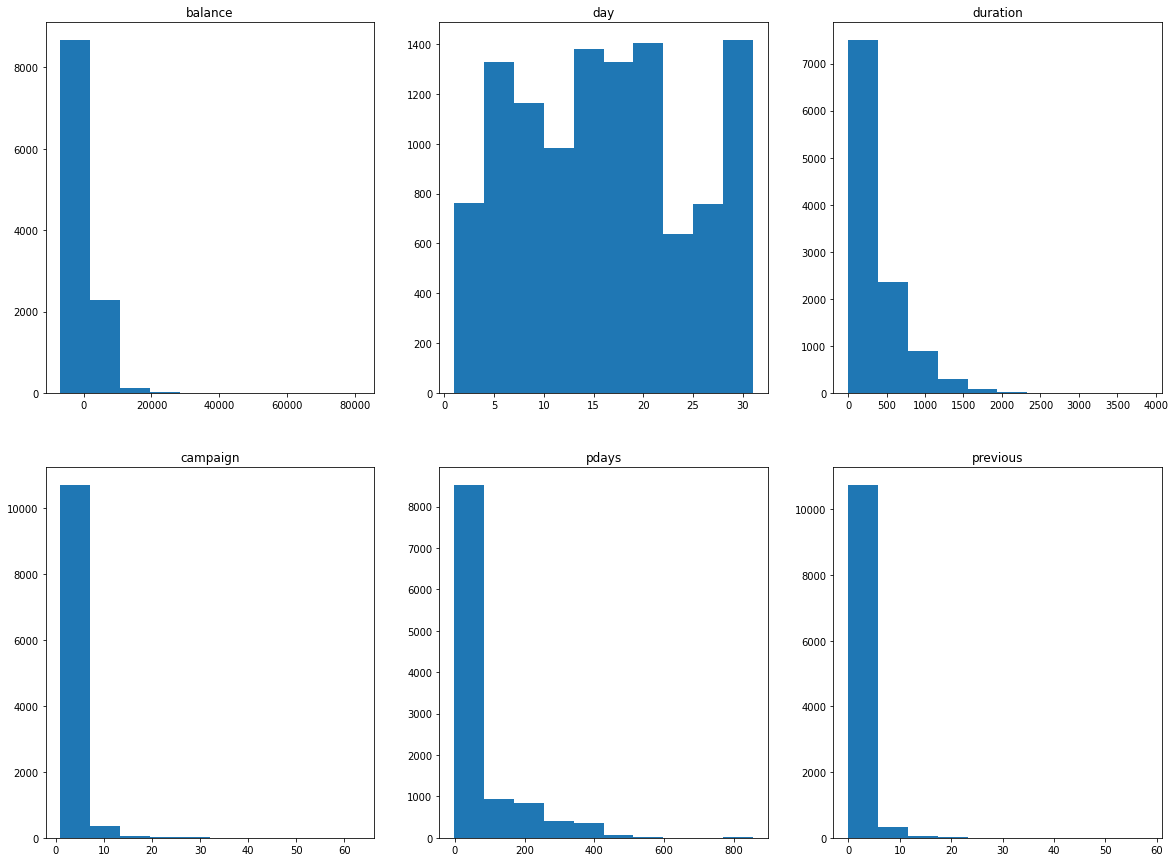

In [58]:
# Numerical columns exploration

num_columns = ['balance', 'day','duration', 'campaign', 'pdays', 'previous']

fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for num_column in num_columns:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    axs[trace_x, trace_y].hist(df[num_column])
    
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1

plt.show()

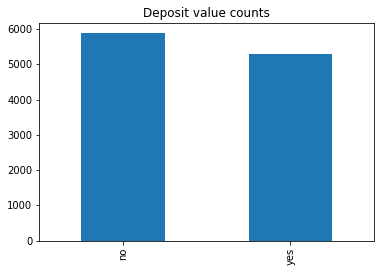

In [59]:
#Analysis of the response column

value_counts = df['deposit'].value_counts()

value_counts.plot.bar(title = 'Deposit value counts')

In [60]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [61]:
#encode categoricals
le = preprocessing.LabelEncoder()

df.job = le.fit_transform(df.job)
df.marital = le.fit_transform(df.marital)
df.education = le.fit_transform(df.education)
df.default = le.fit_transform(df.default)
df.housing = le.fit_transform(df.housing)
df.loan = le.fit_transform(df.loan)
df.contact = le.fit_transform(df.contact)
df.month = le.fit_transform(df.month)
df.poutcome = le.fit_transform(df.poutcome)
df.deposit = le.fit_transform(df.deposit)


In [62]:
#split

X = df.iloc[:,0:16]
y = df.iloc[:,16]

x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0) #80/20 split

In [65]:
# split training set into training and validation
X_train_NN , X_val_NN , y_train_NN , y_val_NN = train_test_split(x_train, y_train, test_size=0.1)

In [70]:
X_train_NN.shape, y_train_NN.shape

((8036, 16), (8036,))

In [95]:
# Building the model 
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(16,)))
model.add(Dropout(.2))
model.add(Dense(1, activation='sigmoid'))

In [96]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [97]:
history = model.fit(X_train_NN, y_train_NN, 
          validation_data=(X_val_NN, y_val_NN),
          epochs=20, batch_size=40,  
          verbose=1
      )



Epoch 1/20
201/201 [==============================] - 1s 3ms/step - loss: 0.6651 - accuracy: 0.5869 - val_loss: 0.6064 - val_accuracy: 0.6506
Epoch 2/20
201/201 [==============================] - 0s 2ms/step - loss: 0.5758 - accuracy: 0.7063 - val_loss: 0.5446 - val_accuracy: 0.7368
Epoch 3/20
201/201 [==============================] - 0s 2ms/step - loss: 0.5460 - accuracy: 0.7245 - val_loss: 0.5194 - val_accuracy: 0.7436
Epoch 4/20
201/201 [==============================] - 0s 2ms/step - loss: 0.5280 - accuracy: 0.7410 - val_loss: 0.5220 - val_accuracy: 0.7447
Epoch 5/20
201/201 [==============================] - 0s 2ms/step - loss: 0.5206 - accuracy: 0.7440 - val_loss: 0.5082 - val_accuracy: 0.7492
Epoch 6/20
201/201 [==============================] - 0s 2ms/step - loss: 0.5142 - accuracy: 0.7464 - val_loss: 0.5005 - val_accuracy: 0.7648
Epoch 7/20
201/201 [==============================] - 0s 2ms/step - loss: 0.5046 - accuracy: 0.7549 - val_loss: 0.5066 - val_accuracy: 0.7626
Epoch 

In [99]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.7671294212341309


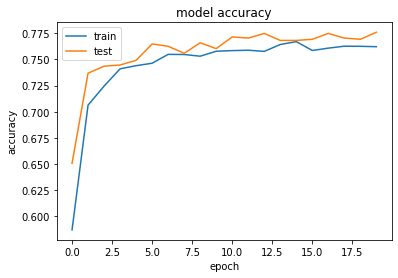

In [100]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

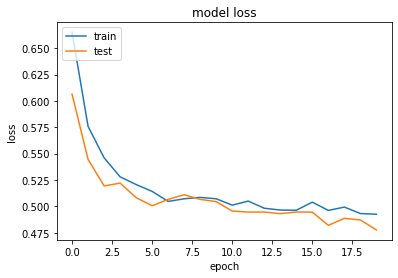

In [101]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()